### 분석 실습

#### 타이타닉 생존자 예측모델 개발 및 평가(아래 사항들 반영 필수)
- Titanic data 전처리
    - 분석 데이터 : titanic3.csv
    - 재사용 가능한 전처리 사용자 함수 작성 하여 일괄 전처리 Null 값 처리
    - 탐색적 분석을 통한 변수 선정 및 파생변수 생성 
    - 훈련 데이터 : 검증 데이터 = 8:2
    - 분류모델 : Decision Tree, Random Forest, Logistic Regression 3개 모두 적용
    - 평가 : 사이킷런 metrics 사용, 다음 항목들을 포함하는 사용자 함수 def get_clf_eval(y_test, pred)을 작성하여 일괄 처리
    \
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
    - 모델 개발 및 평가 결과에 대한 종합 의견


- 컬럼 정보
    - survived : 생존여부(1: 생존, 0 : 사망)
    - pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
    - name : 승객 이름
    - sex : 승객 성별
    - age : 승객 나이
    - sibsp : 동반한 형제자매, 배우자 수
    - parch : 동반한 부모, 자식 수
    - ticket : 티켓의 고유 넘버
    - fare 티켓의 요금
    - cabin : 객실 번호
    - embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)
    - boat
    - body
    - home.dest


- 전처리 안쓸거 삭제, nan 처리 등 재사용 가능하도록 함수 만들기

- 탐색적분석이 뭐야
    - 통계 촵촵 시각화 촵촵
    - 그룹핑, ...

- 분류모델 준걸로
- 평가도 준걸로


- 중간중간 피클로 저장 좋아욤


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_ttn = pd.read_csv('./분석용데이터셋/titanic3.csv')
df_ttn.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df_1 = df_ttn.copy()

In [4]:
df_1.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


# 전처리처리처리

## 드롭드롭

- name, ticket, fare, cabin, embarked, boat, body, home.dest 들을 드롭할까 함
- survived와의 연관성 찾아보기

### name
- 쓰려고 하면 복잡해서 드롭

### ticket
- ticket의 고유 넘버
- 생존과 연관성 없을 것으로 추측

In [5]:
df_1.ticket.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: ticket
Non-Null Count  Dtype 
--------------  ----- 
1309 non-null   object
dtypes: object(1)
memory usage: 10.4+ KB


In [6]:
df_1.ticket.unique()

array(['24160', '113781', '19952', '13502', '112050', '11769', 'PC 17609',
       'PC 17757', 'PC 17477', '19877', '27042', 'PC 17318', 'PC 17558',
       '11813', '13050', '11751', '111369', 'PC 17483', '13905', '11967',
       'PC 17760', '110564', '113784', '112277', '36928', '113783',
       '110489', 'PC 17608', '113505', '111427', '113054', 'PC 17591',
       '112379', 'PC 17610', '16966', '113050', '113798', 'PC 17476',
       'PC 17606', 'PC 17755', '695', '113059', '113760', '19924',
       '17770', 'W.E.P. 5734', '113806', '110152', 'PC 17594', '112051',
       '13508', '110465', '5727', 'PC 17756', '11770', '113791',
       'WE/P 5735', '112901', 'PC 17599', '113055', '113804',
       'F.C. 12750', '17474', '33638', 'PC 17761', '11755', 'PC 17485',
       'PC 17580', '11767', '36947', 'PC 17531', 'PC 17598', '17421',
       'PC 17474', '113051', '19950', '113778', 'PC 17611', '17765',
       '13568', '13567', '112058', '113803', '111320', '113503', '112378',
       'PC 17593

In [7]:
ticket_no = df_1.ticket.copy()

In [8]:
list(ticket_no.sort_values())

['110152',
 '110152',
 '110152',
 '110413',
 '110413',
 '110413',
 '110465',
 '110465',
 '110469',
 '110489',
 '110564',
 '110813',
 '110813',
 '111163',
 '111240',
 '111320',
 '111361',
 '111361',
 '111369',
 '111426',
 '111427',
 '111428',
 '112050',
 '112051',
 '112052',
 '112053',
 '112058',
 '112058',
 '112059',
 '112277',
 '112377',
 '112378',
 '112378',
 '112379',
 '112901',
 '113028',
 '113038',
 '113043',
 '113044',
 '113050',
 '113051',
 '113054',
 '113055',
 '113056',
 '113059',
 '113059',
 '113501',
 '113503',
 '113503',
 '113503',
 '113503',
 '113503',
 '113505',
 '113505',
 '113509',
 '113509',
 '113510',
 '113514',
 '113572',
 '113572',
 '113760',
 '113760',
 '113760',
 '113760',
 '113767',
 '113773',
 '113773',
 '113776',
 '113776',
 '113778',
 '113780',
 '113781',
 '113781',
 '113781',
 '113781',
 '113781',
 '113781',
 '113783',
 '113784',
 '113786',
 '113787',
 '113788',
 '113789',
 '113789',
 '113790',
 '113791',
 '113792',
 '113794',
 '113795',
 '113796',
 '113796',

### fare
- 중복

In [9]:
g_pclass = df_1.groupby(['pclass'])

In [10]:
g_pclass.agg({'fare': ['mean', 'median']})

fare         
             mean   median
pclass                    
1       87.508992  60.0000
2       21.179196  15.0458
3       13.302889   8.0500

- ★ 둘중에 뭐 살릴지

In [11]:
df_1[['pclass', 'fare', 'survived']].head()

,pclass,fare,survived
0,1,211.3375,1
1,1,151.5500,1
2,1,151.5500,0
3,1,151.5500,0
4,1,151.5500,0


In [12]:
g_pclass.agg({'survived': 'mean'})

,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


In [13]:
df_1.fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [14]:
df_1.fare.min()

0.0

<AxesSubplot:>

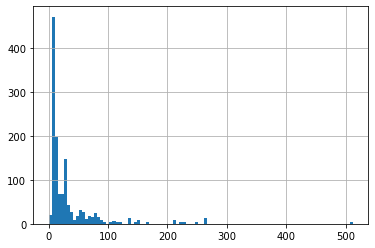

In [15]:
df_1.fare.hist(bins=100)

<AxesSubplot:xlabel='fare'>

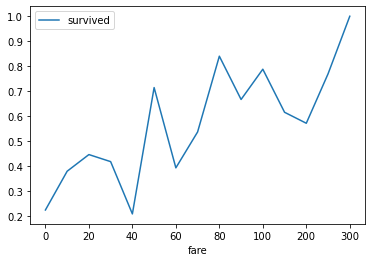

In [16]:
df2 = df_1.copy()

df2.fare = pd.cut(x=df_1.fare,
       bins=[df_1.fare.min(), 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0,
             150.0, 200.0, 250.0, 300.0,  df_1.fare.max()],
       labels=list(range(0, 100, 10))+list(range(100, 301, 50)),
       include_lowest=True)

g_fare = df2.groupby('fare')
f_agg = g_fare.agg({'survived': 'mean'})

f_agg.plot()

In [17]:
df3 = df_1[['fare', 'survived']].copy()
df3.head()

,fare,survived
0,211.3375,1
1,151.5500,1
2,151.5500,0
3,151.5500,0
4,151.5500,0


In [18]:
df3 = df3.sort_values(by='fare')
df3.head()

,fare,survived
363,0.0,0
223,0.0,0
170,0.0,1
1254,0.0,1
896,0.0,0


In [19]:
df3.reset_index(inplace=True, drop=True) 
#drop= True로 기존 index가 새 column으로 추가되는 것을 막는다.
df3.head()

,fare,survived
0,0.0,0
1,0.0,0
2,0.0,1
3,0.0,1
4,0.0,0


In [20]:
df3.isna().sum()

fare        1
survived    0
dtype: int64

- nan을 드롭

In [21]:
df3.dropna(inplace=True)
df3.isna().sum(), df3.count()

(fare        0
 survived    0
 dtype: int64,
 fare        1308
 survived    1308
 dtype: int64)

- 20씩 묶어 fare 평균 vs. survived 평균, 그래프로
    - 행 갯수가 1308개로 20개씩하면 65묶음과 8개가 남는다.
    -

In [22]:
1308//20, 1308%20

(65, 8)

In [23]:
df3.head()

,fare,survived
0,0.0,0
1,0.0,0
2,0.0,1
3,0.0,1
4,0.0,0


In [24]:
type(df3.fare.count()), df3.fare.count()

(numpy.int64, 1308)

In [25]:
fare_bundle = 10
list_fare = []
list_survived = []

for i in range(df3.fare.count()//fare_bundle):
    list_fare.append(df3.fare[20*i:20*(i+1)].mean())
    list_survived.append(df3.survived[20*i:20*(i+1)].mean())
#     print(f"*****{i}*****")
#     print(round(df3.fare[i:i+20].mean(), 2), end='\t\t\t')
#     print(round(df3.survived[i:i+20].mean(), 2))

In [26]:
len(list_fare), len(set(list_fare))

(130, 63)

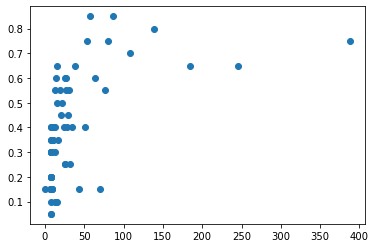

In [27]:
plt.scatter(list_fare, list_survived)

In [28]:
df3.corr()

,fare,survived
fare,1.000000,0.244265
survived,0.244265,1.000000


- fare는 사용하지 않기로 결정.

### cabin

In [29]:
df_1.cabin.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: cabin
Non-Null Count  Dtype 
--------------  ----- 
295 non-null    object
dtypes: object(1)
memory usage: 10.4+ KB


In [30]:
df_1.cabin.unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

- nan 값이 많고( nan 값에 의미가 있을 지도 모르지만 일단 모름)
- 사용도 까다로워 (알파벳을 추출해야할듯)
- 사용 안하기로

### embarked

- C(Cherbourg), Q(Queenstown), S(Southampton)

In [31]:
df_1.embarked.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [32]:
df_1.embarked.isna().sum()

2

In [33]:
g_embarked = df_1.groupby('embarked')

In [34]:
g_embarked['survived'].describe()

,count,mean,std,min,25%,50%,75%,max
embarked,,,,,,,,
C,270.0,0.555556,0.497827,0.0,0.0,1.0,1.0,1.0
Q,123.0,0.357724,0.481291,0.0,0.0,0.0,1.0,1.0
S,914.0,0.332604,0.471404,0.0,0.0,0.0,1.0,1.0


- C 가 생존률이 높긴 한데 왜 그런지 모르겠음
- 사용 X

### boat

- 종속

### body

- 종속

### home.dest

In [35]:
df_1['home.dest'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1309 entries, 0 to 1308
Series name: home.dest
Non-Null Count  Dtype 
--------------  ----- 
745 non-null    object
dtypes: object(1)
memory usage: 10.4+ KB


In [36]:
df_1['home.dest'].isna().sum()

564

In [37]:
df_1['home.dest'].unique()

array(['St Louis, MO', 'Montreal, PQ / Chesterville, ON', 'New York, NY',
       'Hudson, NY', 'Belfast, NI', 'Bayside, Queens, NY',
       'Montevideo, Uruguay', 'Paris, France', nan, 'Hessle, Yorks',
       'Montreal, PQ', 'Winnipeg, MN', 'San Francisco, CA',
       'Dowagiac, MI', 'Stockholm, Sweden / Washington, DC',
       'Trenton, NJ', 'Glen Ridge, NJ', 'Youngstown, OH',
       'Birkdale, England Cleveland, Ohio', 'London / Winnipeg, MB',
       'Cooperstown, NY', 'St Leonards-on-Sea, England Ohio',
       'Los Angeles, CA', 'Pomeroy, WA', 'Omaha, NE', 'Philadelphia, PA',
       'Denver, CO', 'Belmont, MA', 'Washington, DC',
       'Austria-Hungary / Germantown, Philadelphia, PA',
       'Germantown, Philadelphia, PA', 'Bryn Mawr, PA',
       'Ascot, Berkshire / Rochester, NY', 'Little Onn Hall, Staffs',
       'Amenia, ND', 'New York, NY / Ithaca, NY', 'London, England',
       'Liverpool, England / Belfast', 'Stoughton, MA', 'Victoria, BC',
       'Lakewood, NJ', 'Roachdale, I

- 연관성을 찾기에는 값 자체가 너무 자유분방하게 들어가있음

### 안쓰는 columns 떨구기

In [38]:
df4 = df_1.copy()

df4.drop(['name', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], inplace=True, axis=1)
df4.head()

,pclass,survived,sex,age,sibsp,parch
0,1,1,female,29.00,0,0
1,1,1,male,0.92,1,2
2,1,0,female,2.00,1,2
3,1,0,male,30.00,1,2
4,1,0,female,25.00,1,2


## Nan 값 처리

In [72]:
df5 = df4.copy()
df5.head()

,pclass,survived,sex,age,sibsp,parch
0,1,1,female,29.00,0,0
1,1,1,male,0.92,1,2
2,1,0,female,2.00,1,2
3,1,0,male,30.00,1,2
4,1,0,female,25.00,1,2


In [73]:
df5.info()
df5.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 61.5+ KB


pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
dtype: int64

### age의 nan값을 처리

In [77]:
g_ps = df5.groupby([ 'sex', 'pclass'])
df_med = g_ps.agg({'age':  'median'})
df_med

age
sex    pclass      
female 1       36.0
       2       28.0
       3       22.0
male   1       42.0
       2       29.5
       3       25.0

In [78]:
df5.isna().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
dtype: int64

In [82]:
df_med.index

MultiIndex([('female', 1),
            ('female', 2),
            ('female', 3),
            (  'male', 1),
            (  'male', 2),
            (  'male', 3)],
           names=['sex', 'pclass'])

In [86]:
df_med.loc[('female', 1)]

age    36.0
Name: (female, 1), dtype: float64

In [93]:
df6 = df5.copy()

nan_idx = df6.age.isna()
df6.age[nan_idx].head() # nan은 각각 다른 것으로 본다.

15   NaN
37   NaN
40   NaN
46   NaN
59   NaN
Name: age, dtype: float64

In [94]:
fill_med = lambda g: g.fillna(g.median())
df6.age = g_ps.age.apply(fill_med)

In [95]:
df6.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
dtype: int64

In [97]:
set(df6.age[nan_idx]), df_med

({22.0, 25.0, 28.0, 29.5, 36.0, 42.0},
                 age
 sex    pclass      
 female 1       36.0
        2       28.0
        3       22.0
 male   1       42.0
        2       29.5
        3       25.0)

## sipsp, parch를 family로 대체할까?

In [98]:
df7 = df6.copy()
df7.head()

,pclass,survived,sex,age,sibsp,parch
0,1,1,female,29.00,0,0
1,1,1,male,0.92,1,2
2,1,0,female,2.00,1,2
3,1,0,male,30.00,1,2
4,1,0,female,25.00,1,2


## Outlier 처리

## 데이터 숫자화 encoding

# 분류모델

## Decision Tree

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)

## Logistic Regression